0. Author: Md Rakib Hasan
1. Date : 15-2-2023

# Problem Statement:

Pizza Place Sales
A year's worth of sales from a fictitious pizza place, including the date and time of each order and the pizzas served, with additional details on the type, size, quantity, price, and ingredients.
Recommended Analysis:
1. How many customers do we have each day? Are there any peak hours?

2. How many pizzas are typically in an order? Do we have any bestsellers?

3. much money did we make this year? Can we indentify any seasonality in the sales?

4. Are there any pizzas we should take of the menu, or any promotions we could leverage?



# About Dataset:

This pizza sales dataset make up 12 relevant features:

1. order_id: Unique identifier for each order placed by a table
2. order_details_id: Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)
3. pizza_id: Unique key identifier that ties the pizza ordered to its details, like size and price
4. quantity: Quantity ordered for each pizza of the same type and size
5. order_date: Date the order was placed (entered into the system prior to cooking & serving)
6. order_time: Time the order was placed (entered into the system prior to cooking & serving)
7. unit_price: Price of the pizza in USD
8. total_price: unit_price * quantity
9. pizza_size: Size of the pizza (Small, Medium, Large, X Large, or XX Large)
10. pizza_type: Unique key identifier that ties the pizza ordered to its details, like size and price
11. pizza_ingredients: ingredients used in the pizza as shown in the menu (they all include Mozzarella Cheese, even if not specified; and they all include Tomato Sauce, unless another sauce is specified)
12. pizza_name: Name of the pizza as shown in the menu

# Load Library:

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load Dataset:

In [39]:
od=pd.read_csv(r'C:\\Users\\Rakib Hasan\\Downloads\\Pizza+Place+Sales\\pizza_sales\\order_details.csv')
order=pd.read_csv(r'C:\\Users\\Rakib Hasan\\Downloads\\Pizza+Place+Sales\\pizza_sales\\orders.csv')
pt=pd.read_csv(r'C:\\Users\\Rakib Hasan\\Downloads\\Pizza+Place+Sales\\pizza_sales\\pizza_types.csv',encoding='latin-1')
p=pd.read_csv(r'C:\\Users\\Rakib Hasan\\Downloads\\Pizza+Place+Sales\\pizza_sales\\pizzas.csv')

# Merge Data

In [44]:
df1=pd.merge(od,order,on='order_id')

In [46]:
df2=pd.merge(df1,p,on='pizza_id')

In [50]:
df=pd.merge(df2,pt,on='pizza_type_id')

In [51]:
df

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,48176,21167,brie_carre_s,1,2015-12-27,17:39:57,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48616,48244,21198,brie_carre_s,1,2015-12-28,15:39:02,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48617,48311,21225,brie_carre_s,1,2015-12-29,13:20:17,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48618,48456,21282,brie_carre_s,1,2015-12-31,12:09:59,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


# Understanding Data

In [52]:
#show first five rows
df.head(5)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"


In [53]:
#show last five rows
df.tail(5)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
48615,48176,21167,brie_carre_s,1,2015-12-27,17:39:57,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48616,48244,21198,brie_carre_s,1,2015-12-28,15:39:02,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48617,48311,21225,brie_carre_s,1,2015-12-29,13:20:17,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48618,48456,21282,brie_carre_s,1,2015-12-31,12:09:59,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."
48619,48527,21308,brie_carre_s,1,2015-12-31,16:44:35,brie_carre,S,23.65,The Brie Carre Pizza,Supreme,"Brie Carre Cheese, Prosciutto, Caramelized Oni..."


In [54]:
# show random five rows
df.sample(5)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
3747,13586,5957,classic_dlx_s,1,2015-04-10,20:04:44,classic_dlx,S,12.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,..."
6774,42169,18547,ital_supr_l,1,2015-11-12,19:34:00,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni..."
19501,41211,18151,ital_cpcllo_l,1,2015-11-06,11:46:23,ital_cpcllo,L,20.50,The Italian Capocollo Pizza,Classic,"Capocollo, Red Peppers, Tomatoes, Goat Cheese,..."
6043,44175,19417,five_cheese_l,1,2015-11-27,12:30:45,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go..."
20888,25077,11035,spicy_ital_l,1,2015-07-04,14:39:02,spicy_ital,L,20.75,The Spicy Italian Pizza,Supreme,"Capocollo, Tomatoes, Goat Cheese, Artichokes, ..."


In [56]:
# show all columns
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients'],
      dtype='object')

In [57]:
# show data type
df.dtypes

order_details_id      int64
order_id              int64
pizza_id             object
quantity              int64
date                 object
time                 object
pizza_type_id        object
size                 object
price               float64
name                 object
category             object
ingredients          object
dtype: object

In [58]:
# show data shape
df.shape

(48620, 12)

In [59]:
# dataset info
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.8+ MB


In [62]:
# show descriptive statistics
df.describe()

,order_details_id,order_id,quantity,price
count,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132
std,14035.529381,6180.119770,0.143077,3.621789
min,1.000000,1.000000,1.000000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000
max,48620.000000,21350.000000,4.000000,35.950000


# Data Cleaning & Preprocessing

In [66]:
# change date columns datatype
df['date']=pd.to_datetime(df['date'])

In [67]:
# check missing Values
df.isnull().sum()

order_details_id    0
order_id            0
pizza_id            0
quantity            0
date                0
time                0
pizza_type_id       0
size                0
price               0
name                0
category            0
ingredients         0
dtype: int64

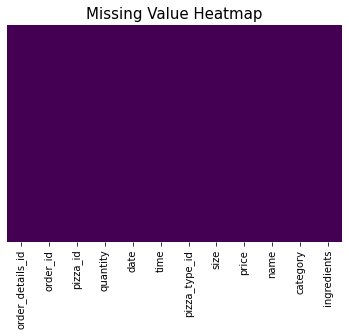

In [73]:
# plot missing value dataframe
sns.heatmap(df.isnull(),cmap='viridis',yticklabels=False,cbar=False)
plt.title('Missing Value Heatmap',fontsize=15);

In [78]:
# check duplicated Data
df.duplicated().sum()

0

In [81]:
# extract Date
df['Year']=df['date'].dt.year
df['Month']=df['date'].dt.month
df['Day']=df['date'].dt.day

In [83]:
df['Year']=df['Year'].astype('int')
df['Month']=df['Month'].astype('int')
df['Day']=df['Day'].astype('int')

In [139]:
df.dtypes

order_details_id             int64
order_id                     int64
pizza_id                    object
quantity                     int64
date                datetime64[ns]
time                        string
pizza_type_id               object
size                        object
price                      float64
name                        object
category                    object
ingredients                 object
Year                         int32
Month                        int32
Day                          int32
Sales                      float64
Day_Name                    object
order_time                  object
Hour                        string
Minutes                     string
Seconds                     string
dtype: object

In [137]:
df['time']=df['time'].astype('string')
df[['Hour','Minutes','Seconds']]=df['time'].str.split(':',expand=True)

In [138]:
df.head(5)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,...,ingredients,Year,Month,Day,Sales,Day_Name,order_time,Hour,Minutes,Seconds
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,...,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,1,13.25,Thursday,11:38:36,11,38,36
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,...,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,2,13.25,Friday,12:22:46,12,22,46
2,357,146,hawaiian_m,1,2015-01-03,14:22:10,hawaiian,M,13.25,The Hawaiian Pizza,...,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,3,13.25,Saturday,14:22:10,14,22,10
3,389,163,hawaiian_m,1,2015-01-03,16:54:54,hawaiian,M,13.25,The Hawaiian Pizza,...,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,3,13.25,Saturday,16:54:54,16,54,54
4,568,247,hawaiian_m,1,2015-01-04,20:55:29,hawaiian,M,13.25,The Hawaiian Pizza,...,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,4,13.25,Sunday,20:55:29,20,55,29


In [86]:
df['Sales']=df['price']*df['quantity']

In [228]:
df['Day_Name']=df['date'].dt.day_name()
df['Month_Name']=df['date'].dt.month_name()

Data is Clean now.

# Data Visulizations

Total Sales Ampont

In [229]:
df.Sales.sum()

817860.05

Total number of Order

In [230]:
df.order_details_id.count()

48620

Average Sales Price

In [231]:
df.price.mean()

16.49413204442518

1. How many customers do we have each day? Are there any peak hours?


In [232]:
df.head(2)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,...,Year,Month,Day,Sales,Day_Name,order_time,Hour,Minutes,Seconds,Month_Name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,...,2015,1,1,13.25,Thursday,11:38:36,11,38,36,January
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,...,2015,1,2,13.25,Friday,12:22:46,12,22,46,January


In [233]:
each_day=df.Day_Name.value_counts()
each_day

Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: Day_Name, dtype: int64

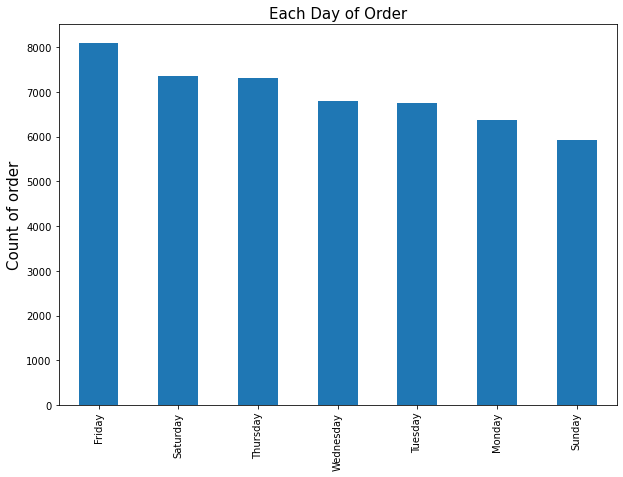

In [234]:
#plot
each_day=df.Day_Name.value_counts()
plt.figure(figsize=(10,7))
each_day.plot(kind='bar')
plt.title('Each Day of Order',fontsize=15)
plt.ylabel('Count of order',fontsize=15);

# Are there any peak hours?

In [ ]:
Peak Hour Per day

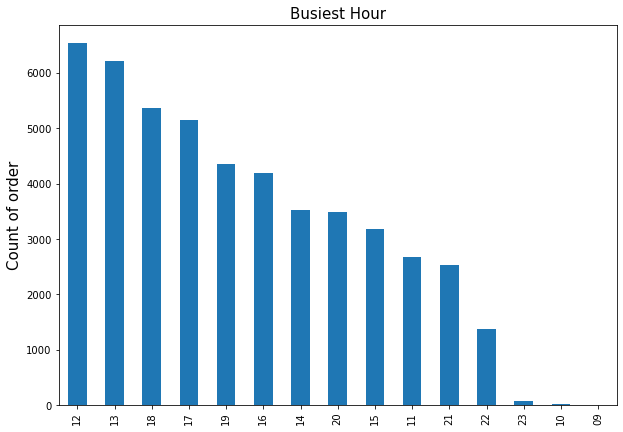

In [161]:
plt.figure(figsize=(10,7))
df['Hour'].value_counts().plot(kind='bar')
plt.title('Busiest Hour',fontsize=15)
plt.ylabel('Count of order',fontsize=15);

# Day & Hour by Orders

In [159]:
pivot=df.pivot_table(index='Day_Name',columns='Hour',values='order_id',aggfunc='count',fill_value=0,margins=True,margins_name='Total')
pivot

Hour,09,10,11,12,13,14,15,16,17,18,19,20,21,22,23,Total
Day_Name,,,,,,,,,,,,,,,,
Friday,0,0,379,1064,1020,513,432,572,752,926,736,695,613,378,26,8106
Monday,0,3,461,1101,774,450,407,534,708,654,529,357,277,110,4,6369
Saturday,0,3,205,603,766,513,516,641,721,873,834,726,584,339,31,7355
Sunday,0,2,227,580,653,510,481,615,702,728,569,403,301,142,4,5917
Thursday,0,5,459,1106,1095,563,460,642,840,796,580,447,216,111,3,7323
Tuesday,4,0,419,1068,988,471,417,618,663,632,590,470,268,145,0,6753
Wednesday,0,4,522,1021,907,501,457,563,757,750,512,389,269,145,0,6797
Total,4,17,2672,6543,6203,3521,3170,4185,5143,5359,4350,3487,2528,1370,68,48620


In [162]:
df.head(2)

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,...,ingredients,Year,Month,Day,Sales,Day_Name,order_time,Hour,Minutes,Seconds
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,...,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,1,13.25,Thursday,11:38:36,11,38,36
1,179,77,hawaiian_m,1,2015-01-02,12:22:46,hawaiian,M,13.25,The Hawaiian Pizza,...,"Sliced Ham, Pineapple, Mozzarella Cheese",2015,1,2,13.25,Friday,12:22:46,12,22,46


# Pizza Order by Month

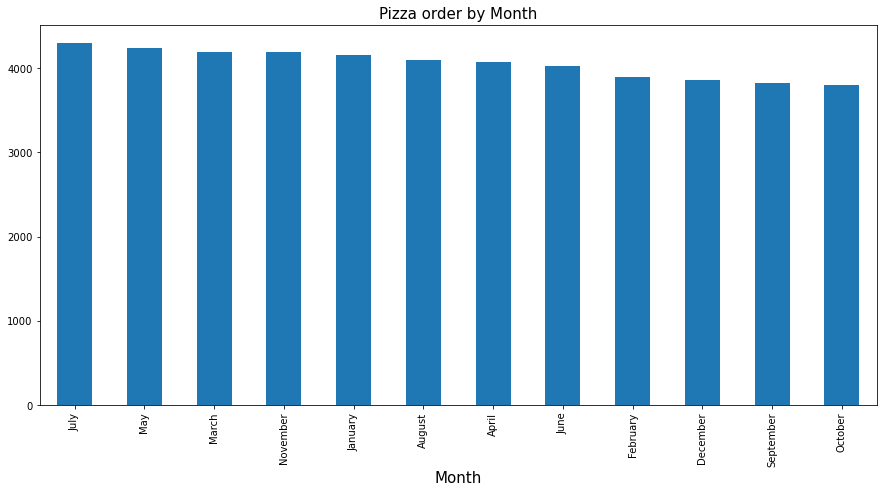

In [201]:
plt.figure(figsize=(15,7))
df.Month_Name.value_counts().plot(kind='bar')
plt.title('Pizza order by Month',fontsize=15)
plt.xlabel('Month',fontsize=15);

In [171]:
df.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients',
       'Year', 'Month', 'Day', 'Sales', 'Day_Name', 'order_time', 'Hour',
       'Minutes', 'Seconds'],
      dtype='object')

# Category Wise Order

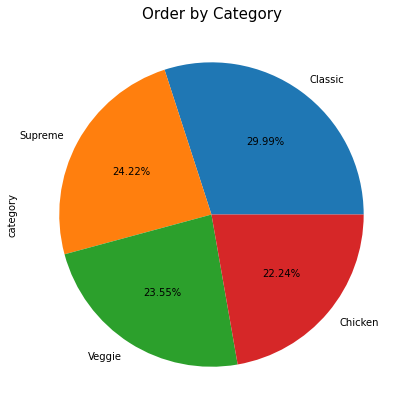

In [178]:
plt.figure(figsize=(10,7))
df.category.value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Order by Category',fontsize=15);

# Order By Size

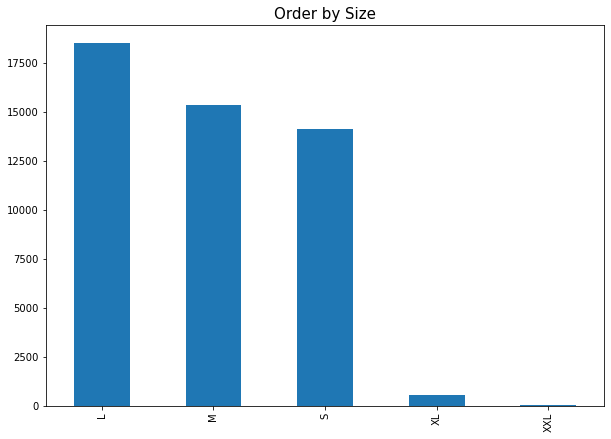

In [214]:
plt.figure(figsize=(10,7))
df['size'].value_counts().plot(kind='bar')
plt.title('Order by Size',fontsize=15);

# Sales By Year

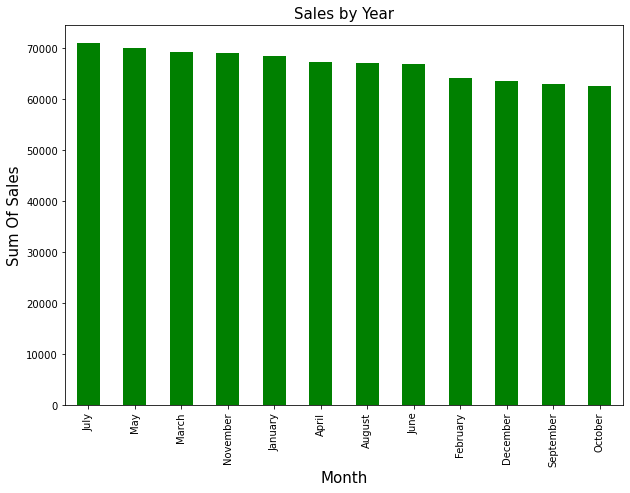

In [213]:
sales_by_month=df.groupby('Month_Name')['price'].sum().sort_values(ascending=False)
sales_by_month
plt.figure(figsize=(10,7))
sales_by_month.plot(kind='bar',color='g')
plt.title('Sales by Year',fontsize=15)
plt.xlabel('Month',fontsize=15)
plt.ylabel('Sum Of Sales',fontsize=15);

# Top 10 Pizza By Sales:

In [209]:
df.groupby('name')['price'].sum()[:10].sort_values(ascending=False)

name
The Barbecue Chicken Pizza      41683.00
The California Chicken Pizza    40166.50
The Classic Deluxe Pizza        37631.50
The Four Cheese Pizza           31361.10
The Five Cheese Pizza           25141.50
The Big Meat Pizza              21732.00
The Chicken Alfredo Pizza       16779.00
The Chicken Pesto Pizza         16484.75
The Calabrese Pizza             15763.75
The Brie Carre Pizza            11352.00
Name: price, dtype: float64

# Bottom 10 Pizza by Sales:

In [239]:
df.groupby('name')['price'].sum()[:-5].sort_values(ascending=True)

name
The Brie Carre Pizza                          11352.00
The Green Garden Pizza                        13819.50
The Mediterranean Pizza                       15163.00
The Calabrese Pizza                           15763.75
The Italian Vegetables Pizza                  15930.75
The Soppressata Pizza                         16342.75
The Chicken Pesto Pizza                       16484.75
The Chicken Alfredo Pizza                     16779.00
The Pepperoni, Mushroom, and Peppers Pizza    18607.00
The Big Meat Pizza                            21732.00
The Prosciutto and Arugula Pizza              23679.75
The Napolitana Pizza                          23850.50
The Italian Capocollo Pizza                   24641.50
The Pepper Salami Pizza                       25081.00
The Five Cheese Pizza                         25141.50
The Mexicana Pizza                            26243.00
The Greek Pizza                               28170.10
The Pepperoni Pizza                           29538.25
The S

Key Insight: Pizza  Sales analysis in the 2015 year.

0.  KPI: Total Sales: $817k, No of Orders: 48620, No of Categoris: 4, Type of Pizzas: 32
1. The number of orders is high on Fridays & Saturdays, especially weekday.Less  orders Sunday.
2. It is usually busy during the 12 PM and 13 PM hrs of the day ( can say during lunch time) followed by evening snacks/dinner time (5  PM to 7 PM  hrs).
3. More than other Month Order was come from the month of July.
4. Classic pizza is generally preferred and Best Selling.
5. L Size pizzas are most popular among other sizes.
   Less popular size xxl.
6. July Month Has the highest number of sales.
7. Top Most Selling Pizza is The Barbecue Chicken Pizza.
8. Wrost Selling is the Brie Carre Pizza.  Improve this pizza.

In [243]:
df.to_excel(r'C:\\Users\\Rakib Hasan\\Downloads\\Pizza+Place+Sales\\pizza_sales\\pizza_sales.xlsx')
